<a href="https://colab.research.google.com/github/Shobanaks/Telco-Customer-Churn_Python/blob/main/Teleco_Customer_Churn__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📂 Upload the dataset (Telco Customer Churn data)
from google.colab import files
uploaded = files.upload()


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (2).csv


In [ ]:
# 🧠 Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

In [ ]:
# Preview first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Basic info
df.shape

# Check for missing values
df.isnull().sum()

# Basic statistics for numeric columns
df.describe()

# Check the value present at a specific row (index 6754) in the 'TotalCharges' column
df['TotalCharges'].iloc[6754]

' '

In [ ]:
# Count how many rows in the 'TotalCharges' column are blank (contain only empty spaces)

(df['TotalCharges'].str.strip() == '').sum()

np.int64(11)

In [ ]:
# Display all rows where 'TotalCharges' column is blank (only spaces)

df[df['TotalCharges'].str.strip() == '']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#  Convert 'TotalCharges' column to numeric type
# 'errors'="coerce" converts any non-numeric or invalid values (like empty strings) into NaN

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Fill missing values (NaN) in 'TotalCharges' with the column's median value

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-778157777.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
df['TotalCharges'].iloc[6754]

np.float64(1397.475)

In [ ]:
df.shape
df.isnull().sum()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Check the number of unique values in each column

df.nunique()


,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
# Count how many customers have churned vs. stayed

df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


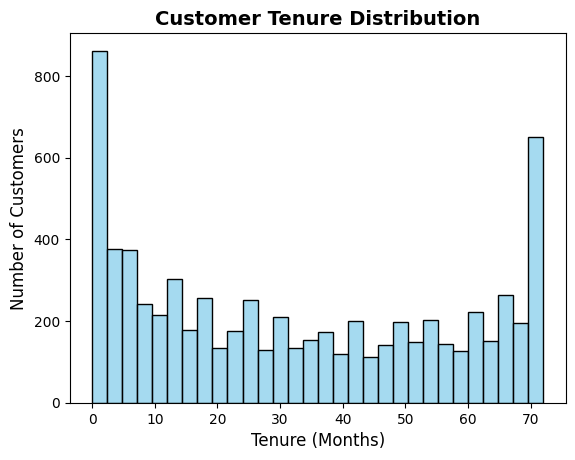

In [ ]:
# Summary statistics for 'tenure' column
df['tenure'].describe()

# Create tenure groups (categorizing customers based on their tenure length)
bins = [0, 6, 12, 24, 48, 72]
labels = ['0-6', '7-12', '13-24', '25-48', '49+']

# Create a new column 'tenure_group' using the defined bins
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Check churn percentage within each tenure group
pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100

# Visualize customer tenure distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Customer Tenure Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

#🔍 Insight:
# Most customers are new (tenure 0–20 months), forming a large part of the customer base.
# Churn percentage is higher among short-tenure customers and decreases as tenure increases.

In [ ]:
# Create a cross-tabulation between 'Contract' type and 'Churn'
ct = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
ct



Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


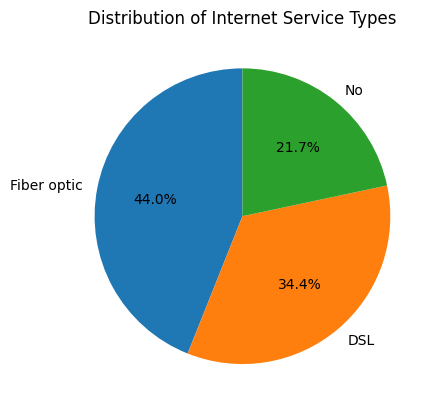

In [ ]:
# Cross-tab to check churn distribution by Internet Service type
pd.crosstab(df['InternetService'], df['Churn'])

# Visualize the overall distribution of Internet Service types
plt.pie(
    df['InternetService'].value_counts(),
    labels=df['InternetService'].value_counts().index,
    autopct='%1.1f%%',                                                          # Show percentages on the pie chart
    startangle=90                                                               # Start from the top
)
plt.title('Distribution of Internet Service Types')
plt.show()

#🔍 Insight:
# Fiber optic customers dominate the base but also show higher churn rates, suggesting potential service or pricing concerns.
#📈 DSL and non-internet customers have lower churn, indicating better stability or simpler service needs.


Churn % by Payment Method:
 Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


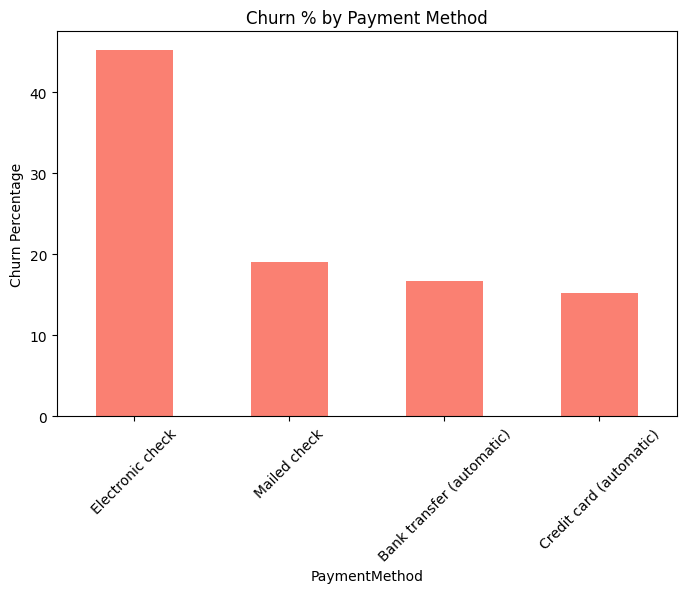

Churn % by Paperless Billing:
 Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092


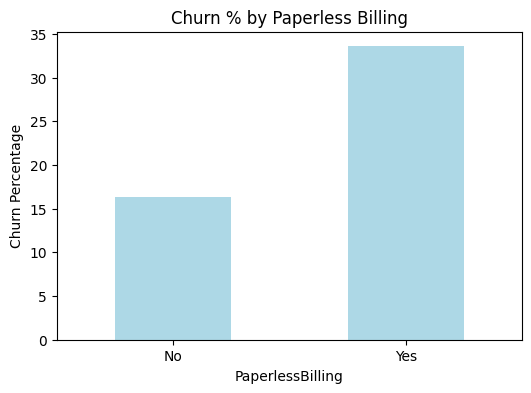

In [ ]:
# Churn % by Payment Method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
print("Churn % by Payment Method:\n", payment_churn)

# Bar chart for Payment Method churn %
plt.figure(figsize=(8,5))
payment_churn['Yes'].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.ylabel('Churn Percentage')
plt.title('Churn % by Payment Method')
plt.xticks(rotation=45)
plt.show()

# Churn % by Paperless Billing
paperless_churn = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100
print("Churn % by Paperless Billing:\n", paperless_churn)

# Bar chart for Paperless Billing churn %
plt.figure(figsize=(6,4))
paperless_churn['Yes'].plot(kind='bar', color='lightblue')
plt.ylabel('Churn Percentage')
plt.title('Churn % by Paperless Billing')
plt.xticks(rotation=0)
plt.show()

#🔍 Insight:
#💳 Customers using electronic checks have the highest churn, while automatic payments help retain customers.
#📄 Paperless billing users churn more, indicating they are more active and likely to explore alternatives.


Median Charges by Churn:
        MonthlyCharges  TotalCharges
Churn                              
No             64.425      1679.525
Yes            79.650       703.550


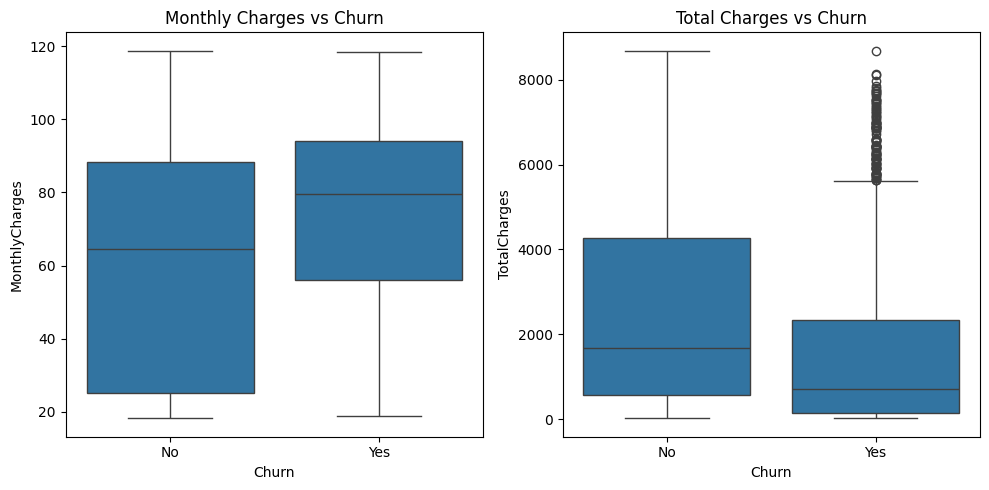

In [ ]:
# Median charges by Churn
median_charges = df[['MonthlyCharges','TotalCharges','Churn']].groupby('Churn').median()
print("Median Charges by Churn:\n", median_charges)

# Side-by-side boxplots
plt.figure(figsize=(10,5))

# Monthly Charges comparison
plt.subplot(1,2,1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')

# Total Charges comparison
plt.subplot(1,2,2)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')

plt.tight_layout()
plt.show()


#🔍 Insight:
#💰 Churned customers pay higher monthly charges but have lower total charges, indicating they leave early due to cost sensitivity.
#📈 Long-term customers have lower monthly rates but higher lifetime value.


gender
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338
---
Partner
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903
---
Dependents
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237
---
PhoneService
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637
---
MultipleLines
Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896
---
InternetService
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980
---
OnlineSecurity

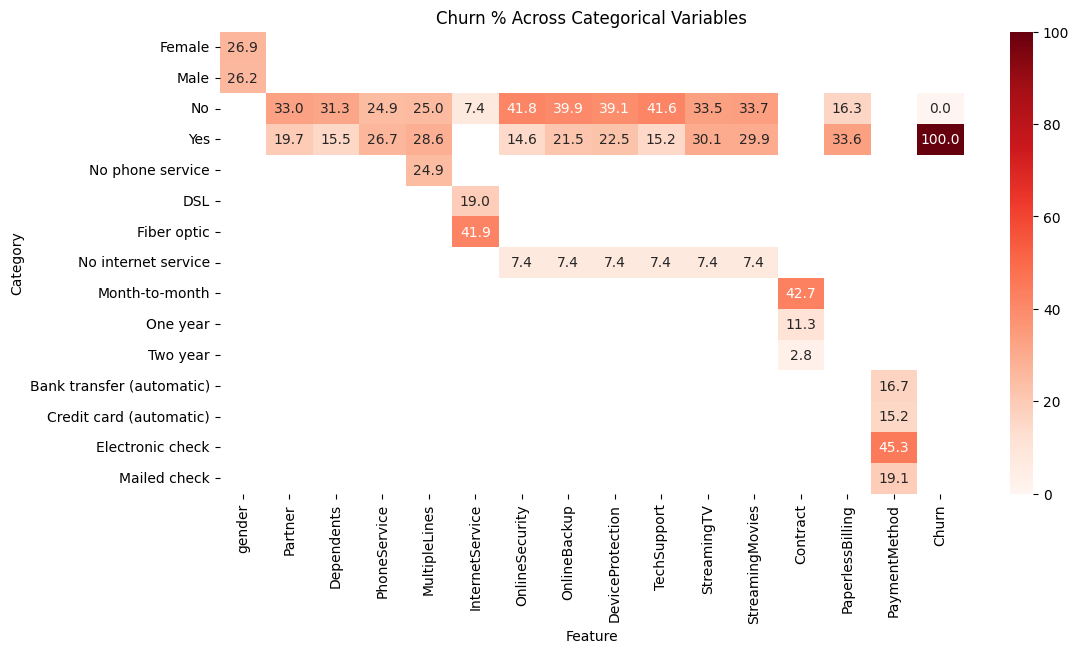

In [ ]:
# List of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')

# create a dataframe to store churn % for all categorical columns
churn_cat_df = pd.DataFrame()

for col in cat_cols:
    print(col)
    churn_pct = pd.crosstab(df[col], df['Churn'], normalize='index')*100
    print(churn_pct)
    print('---')

    # Add to combined dataframe for heatmap
    churn_cat_df = pd.concat([churn_cat_df, churn_pct['Yes'].rename(col)], axis=1)

# Heatmap for all categorical drivers
plt.figure(figsize=(12,6))
sns.heatmap(churn_cat_df, annot=True, fmt=".1f", cmap='Reds')
plt.title("Churn % Across Categorical Variables")
plt.ylabel("Category")
plt.xlabel("Feature")
plt.show()

#🔍 Insight:
#📊 High churn: Month-to-month, fiber optic, and electronic check users.
#💡 Low churn: Long-term contracts, auto-pay, and tech support users.


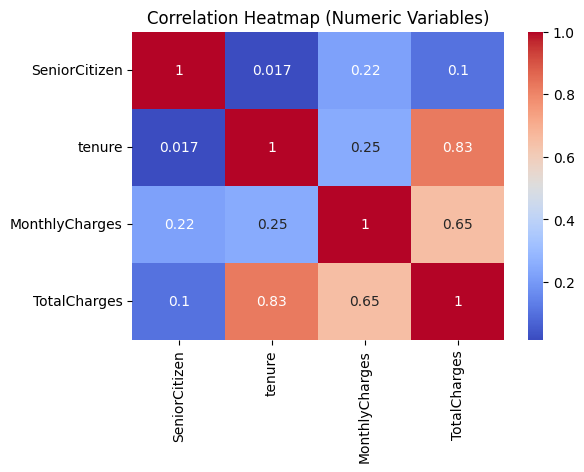

In [ ]:
# Select only numeric columns for correlation
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Variables)')
plt.show()

#🔍 Insight:
#📈 Tenure and TotalCharges are highly correlated.
#💰 Higher MonthlyCharges slightly increase churn likelihood.


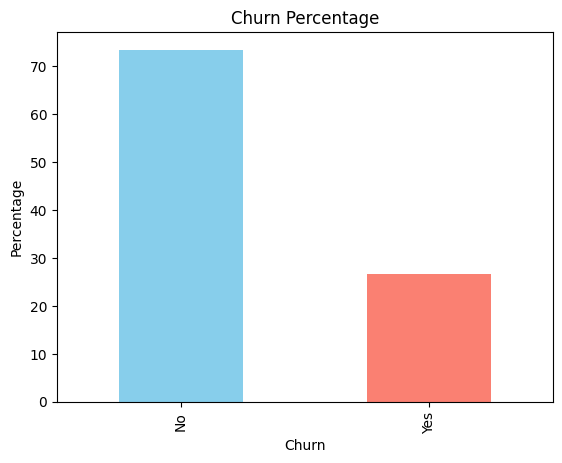

In [ ]:
# Calculate churn percentage
churn_percent = df['Churn'].value_counts(normalize=True) * 100

# Plot churn distribution (Yes vs No)
churn_percent.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Percentage')
plt.ylabel('Percentage')
plt.show()

#🔍 Insight:
#🔹 Around 25–30% of customers have churned.
#🔸 Indicates a need to identify key factors behind customer loss.
